In [5]:
import numpy as np
from PIL import Image
import os
import pandas as pd

import torch

In [6]:
100 * 0.005 + 0.68

1.1800000000000002

In [7]:
def normalize_loss(loss):
    return 1 - (loss / (-torch.log(torch.tensor(1e-1))))

In [8]:
1e-1

0.1

In [9]:
normalize_loss(0.8)

tensor(0.6526)

In [10]:
0.63/-torch.log(torch.tensor(1e-1))

tensor(0.2736)

In [11]:
k = pd.read_csv('/home/mohanty/PycharmProjects/Project_Spacer3/train_logs/spacer2023-02-09 22:40:40/DDPG_logcorrect_actions (copy).csv', header=None)

FileNotFoundError: [Errno 2] No such file or directory: '/home/mohanty/PycharmProjects/Project_Spacer3/train_logs/spacer2023-02-09 22:40:40/DDPG_logcorrect_actions (copy).csv'

In [ ]:
k

In [ ]:
import csv
import numpy as np
data_set = []
with open("/home/mohanty/PycharmProjects/Scribed spacer_1light/train_logs/spacer2023-02-16 22:50:36/actions_less_than_4.csv", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        data = row[0]
        np_array = np.fromstring(data.replace("[", "").replace("]", ""), sep=" ")
        data_set.append(np_array)
        # data = data.replace("\n", "").split(" ")
        # data = [float(x) for x in data]
        print(np_array)

In [ ]:
import pandas as pd
m = pd.DataFrame(data_set)

In [ ]:
m

In [ ]:
m.to_csv("/home/mohanty/PycharmProjects/Scribed PPO_1light/spacer_gym/envs/initial_act_Less_then4.csv",header=False)

In [ ]:
import gym

# Create a Box action space with a range of [-1, 1]
action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(2,))

In [ ]:
np.random.uniform(low=-1.0, high=1.0, size=(11,))

In [ ]:
from stable_baselines3 import DDPG
import stable_baselines3
print(stable_baselines3.__version__)

In [ ]:
from stable_baselines3.common.noise import OrnsteinUhlenbeckActionNoise
from stable_baselines3 import DDPG
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(3), sigma=0.1 * np.ones(3))

In [ ]:
action_noise

In [108]:
def center_crop_to_square(img):
    width, height = img.size
    size = min(width, height)
    left = (width - size) / 2
    top = (height - size) / 2
    right = (width + size) / 2
    bottom = (height + size) / 2
    return img.crop((left, top, right, bottom))

In [ ]:
def augument(image, random_number):
    if random_number == 0:
        return image
    elif random_number == 1:
        return image.transpose(Image.FLIP_TOP_BOTTOM)
    elif random_number == 2:
        image = image.transpose(Image.FLIP_TOP_BOTTOM)
        return image.transpose(Image.FLIP_LEFT_RIGHT)
    else:
        return image.transpose(Image.FLIP_LEFT_RIGHT)


In [ ]:
s1 = Image.open("/home/mohanty/PycharmProjects/Project_Spacer/spacer_gym/temp/image1675583662.1681366.png")

In [ ]:
s1 = center_crop_to_square(s1)
s1 = s1.resize((224, 224))

In [1]:
import cv2
import os
import numpy as np

#!/usr/bin/env python

# Python script to automatically convert poor-quality
# photos of paper with writing on them into duotone images.

import sys
import cv2
import numpy as np
import os.path
import multiprocessing
from itertools import starmap

NBHD_SIZE = 19
UNSHARP_T = 48
ADAPT_T = 24

INVERT = True
ASPECT = 8.5 / 11.0


class PHOTOCOPY:
    def __init__(self, NBHD_SIZE_=19):
        self.NBHD_SIZE = NBHD_SIZE_

    def __call__(self, img_, NBHD_SIZ=19):
        img = img_.copy()
        img = 255 - img
        return self.bitone(img, NBHD_SIZ)

    def bitone(self, image, NBHD_SIZE):
        '''
        Convert a greyscale image to a bitone image,
        in such a way that we preserve as much detail as possible,
        and have the least amount of speckles.
        '''
        # First, sharpen the image: unsharp mask w/ threshold.
        blur = cv2.blur(image, (NBHD_SIZE, NBHD_SIZE))
        diff = cv2.absdiff(image, blur)

        return diff


def convert_to_gray(img):
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def unevenLightCompensate(img, blockSize):
    img = convert_to_gray(img)
    average = np.mean(img)

    rows_new = int(np.ceil(img.shape[0] / blockSize))
    cols_new = int(np.ceil(img.shape[1] / blockSize))

    blockImage = np.zeros((rows_new, cols_new), dtype=np.float32)
    for r in range(rows_new):
        for c in range(cols_new):
            rowmin = r * blockSize
            rowmax = (r + 1) * blockSize
            if (rowmax > img.shape[0]):
                rowmax = img.shape[0]
            colmin = c * blockSize
            colmax = (c + 1) * blockSize
            if (colmax > img.shape[1]):
                colmax = img.shape[1]

            imageROI = img[rowmin:rowmax, colmin:colmax]
            temaver = np.mean(imageROI)
            blockImage[r, c] = temaver

    blockImage = blockImage - average
    blockImage2 = cv2.resize(blockImage, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
    img2 = img.astype(np.float32)
    dst = img2 - blockImage2
    dst = dst.astype(np.uint8)
    dst = cv2.GaussianBlur(dst, (3, 3), 0)
    dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

    return dst


address = "/home/mohanty/PycharmProjects/Scribed PPO_1light -2/spacer_gym/temp2023-02-22 22:01:10/"
f = os.listdir(address)
phtocopy_filter = PHOTOCOPY(19)
for image in f:
    img = cv2.imread('/home/mohanty/PycharmProjects/Scribed PPO_1light -2/spacer_gym/temp2023-02-23 16:11:18/image1_10.png')
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h, w = gray_img.shape[:2]
    blur_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
    _, binary = cv2.threshold(blur_img, 40, 255, cv2.THRESH_BINARY)

    kernel = np.ones((3, 3), np.uint8)
    dilation = cv2.erode(binary, kernel, iterations=2)
    dilation = cv2.dilate(dilation, kernel, iterations=1)
    canny = cv2.Canny(dilation, 30, 100)
    canny = cv2.dilate(canny, kernel, iterations=2)

    contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    target_cnts = {}
    for i, cnt in enumerate(contours):
        cnt_area = cv2.contourArea(cnt)
        print (cnt_area)
        if cnt_area > 1000:
            target_cnts[cnt_area] = cnt
    # sort
    target_cnts = list(dict(sorted(target_cnts.items())).values())
    target_cnts = target_cnts[::2]  # filter repeat cnt
    if len(target_cnts) >= 2:#, 'Failed to find rings edge {}'.format(len(target_cnts))

        masked_img = np.zeros((h, w), np.uint8)
        outer_cnt = target_cnts[1]
        inner_cnt = target_cnts[0]

        ((outer_x, outer_y), outer_radius) = cv2.minEnclosingCircle(outer_cnt)
        ((inner_x, inner_y), inner_radius) = cv2.minEnclosingCircle(inner_cnt)
        cv2.circle(masked_img, (int(outer_x), int(outer_y)), int(outer_radius), 255, -1)
        cv2.circle(masked_img, (int(inner_x), int(inner_y)), int(inner_radius), 0, -1)

        # dst = unevenLightCompensate(img=img, blockSize=32)
        res = cv2.bitwise_and(gray_img, gray_img, mask=masked_img)
    # else:
    #     res =
        copy_img = phtocopy_filter(res)
        break
        cv2.imshow('raw_img', gray_img)
        cv2.imshow('mask', masked_img)
        # cv2.imshow('dst', dst)

        cv2.imshow('res', res)
        cv2.imshow('copy_img', copy_img)

        cv2.waitKey(0)
    # return target_cnts, masked_img

    # cv2.imshow('Result', canny)
    # cv2.waitKey(0)
    # sample_image = Image.open(address+image)
    # sample_image = center_crop_to_square(sample_image)
    # sample_image = sample_image.resize((448, 448))
    # img_array = np.asarray(sample_image)
    break

In [2]:
contours

(array([[[1206,   77]],
 
        [[1205,   78]],
 
        [[1203,   78]],
 
        ...,
 
        [[1215,   78]],
 
        [[1211,   78]],
 
        [[1210,   77]]], dtype=int32),
 array([[[1219,   82]],
 
        [[1220,   81]],
 
        [[1226,   81]],
 
        ...,
 
        [[1187,   83]],
 
        [[1206,   83]],
 
        [[1207,   82]]], dtype=int32),
 array([[[1229,  265]],
 
        [[1228,  266]],
 
        [[1215,  266]],
 
        ...,
 
        [[1263,  266]],
 
        [[1239,  266]],
 
        [[1238,  265]]], dtype=int32),
 array([[[1232,  270]],
 
        [[1233,  269]],
 
        [[1234,  269]],
 
        ...,
 
        [[1195,  271]],
 
        [[1218,  271]],
 
        [[1219,  270]]], dtype=int32))

In [ ]:
# Invert the image to create black pixels in the border
# inverted = cv2.bitwise_not(canny)
#
# # Perform another dilation to add white pixels between the black pixels
# border_size = 10
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (border_size,border_size))
# closed = cv2.morphologyEx(inverted, cv2.MORPH_CLOSE, kernel)
# #
# # # Invert the result to get the white pixels inside the border
# # result = cv2.bitwise_not(closed)

# Show the result
cv2.imshow('Result', blur_img)
cv2.waitKey(0)

QObject::moveToThread: Current thread (0x23ed080) is not the object's thread (0x332fb50).
Cannot move to target thread (0x23ed080)

QObject::moveToThread: Current thread (0x23ed080) is not the object's thread (0x332fb50).
Cannot move to target thread (0x23ed080)

QObject::moveToThread: Current thread (0x23ed080) is not the object's thread (0x332fb50).
Cannot move to target thread (0x23ed080)

QObject::moveToThread: Current thread (0x23ed080) is not the object's thread (0x332fb50).
Cannot move to target thread (0x23ed080)

QObject::moveToThread: Current thread (0x23ed080) is not the object's thread (0x332fb50).
Cannot move to target thread (0x23ed080)

QObject::moveToThread: Current thread (0x23ed080) is not the object's thread (0x332fb50).
Cannot move to target thread (0x23ed080)

QObject::moveToThread: Current thread (0x23ed080) is not the object's thread (0x332fb50).
Cannot move to target thread (0x23ed080)

QObject::moveToThread: Current thread (0x23ed080) is not the object's thread

In [ ]:
cv2.imshow('copy_img', canny)

cv2.waitKey(0)
# return target_cnts, ma

QObject::moveToThread: Current thread (0x38e98e0) is not the object's thread (0x39538e0).
Cannot move to target thread (0x38e98e0)

QObject::moveToThread: Current thread (0x38e98e0) is not the object's thread (0x39538e0).
Cannot move to target thread (0x38e98e0)

QObject::moveToThread: Current thread (0x38e98e0) is not the object's thread (0x39538e0).
Cannot move to target thread (0x38e98e0)

QObject::moveToThread: Current thread (0x38e98e0) is not the object's thread (0x39538e0).
Cannot move to target thread (0x38e98e0)

QObject::moveToThread: Current thread (0x38e98e0) is not the object's thread (0x39538e0).
Cannot move to target thread (0x38e98e0)

QObject::moveToThread: Current thread (0x38e98e0) is not the object's thread (0x39538e0).
Cannot move to target thread (0x38e98e0)

QObject::moveToThread: Current thread (0x38e98e0) is not the object's thread (0x39538e0).
Cannot move to target thread (0x38e98e0)

QObject::moveToThread: Current thread (0x38e98e0) is not the object's thread

In [ ]:
s2 = np.asarray(s2)/255

In [ ]:
np.average(s2)

In [ ]:
import torch

# Sample data
batch_size = 32

# Generate random input and target data
inputs = torch.randn(batch_size, 2)
target = torch.tensor([[0, 1] for i in range(batch_size)])

# Convert target labels to float tensors
target = target.float()

# Compute the loss
loss = torch.nn.BCELoss()
output = loss(inputs, target)


In [ ]:
import math

In [ ]:
def normalize_bce_loss(loss):
    return 10 - (loss / (-torch.log(1e-9)))

In [ ]:
normalize_bce_loss(100)

In [ ]:
def chk (done_cond, steps):
    if 0.17 > done_cond > 0.12 and steps < 5:
        return False
    else:
        return True

In [ ]:
def chk (done_cond, steps):
    return False if 0.17 > done_cond > 0.12 and steps < 5 else True

In [ ]:
chk(0.16, 4)

In [ ]:
m = [10,0.16692181755514707, 0.1840888528262868, 0.20929942411534927, 0.20589832979090072, 0.1256765926585478, 0.18263101016773894, 0.2023925182866115, 0.14574967926623775, 0.13235090667126223, 0.15362512925091912]

In [ ]:
obs_range = {'range1': [0.1282, 0.14], 'range2': [0.14, 0.15], 'range3': [0.15, 0.16]}

In [ ]:
def find_range(number, dictionary):
    for key, value in dictionary.items():
        if value[0] <= number <= value[1]:
            return key
    return None

In [ ]:
l = find_range(0.161, obs_range)

In [ ]:
l == None

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("/home/mohanty/PycharmProjects/Project_Spacer5/spacer_data/train/3idx_0deg.png")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur to reduce noise
gray = cv2.GaussianBlur(gray, (3,3), 0)

# Detect the circular ring using Hough Circle Transform
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

# Extract the coordinates and radius of the circular ring
x, y, r = int(circles[0][0][0]), int(circles[0][0][1]), int(circles[0][0][2])

# Define the number of sections
num_sections = 18

# Calculate the angle step in radians
angle_step = 2 * np.pi / num_sections

# For each section
for i in range(num_sections):
    # Calculate the start and end angle in radians
    start_angle = i * angle_step
    end_angle = (i+1) * angle_step
    angle = start_angle + (end_angle - start_angle) / 2

    # Define the rotated rectangle
    rect = ((x, y), (r*2, r*2), angle * 180 / np.pi)

    # Crop the section
    rotated = cv2.getRectSubPix(img, (r*2, r*2), (x, y))
    cropped = cv2.getRectSubPix(rotated, (r*2, r), (r, r))

    # Resize the cropped image
    resized = cv2.resize(cropped, (224, 224))
    print (resized)
    break
    # Save the cropped and resized


In [ ]:
img = Image.fromarray(resized)

In [ ]:
x

In [ ]:
import stable_baselines3

# Load the replay buffer
replay_buffer = stable_baselines3.DDPG.ReplayBuffer.load("/home/mohanty/PycharmProjects/Project_Spacer6/train_logs/spacer2023-02-12 02:34:07/DDPG_BUFFER_modelh.pkl")

In [ ]:
import stable_baselines3

# Load the saved DDPG model
model = stable_baselines3.DDPG.load("/home/mohanty/PycharmProjects/Project_Spacer6/train_logs/spacer2023-02-12 02:34:07/DDPG_final_modelh.zip")

# Get the replay buffer
replay_buffer = model.replay_buffer

# Get the length of the replay buffer
length = len(replay_buffer)


In [ ]:
replay_buffer.buffer_size

In [ ]:
from PIL import Image, ImageDraw, ImageFilter

# Load the image
img = Image.open("/home/mohanty/PycharmProjects/Project_Spacer6/spacer_gym/temp2023-02-12 02:34:10/image2023-02-12 13:03:22.png")
img = center_crop_to_square(img)
img = img.resize((1024, 1024))
blurred_img = img.filter(ImageFilter.GaussianBlur(0.5))
# Calculate the desired offset in the X and Y directions
# offset_x = 50
# offset_y = 100
#
# # Create a translated version of the image
# translated_img = img.transform(img.size, Image.AFFINE, (1, 0, offset_x, 0, 1, offset_y), Image.BICUBIC)
#
# # Create a black image with the same size as the original image
# black_img = Image.new("RGB", img.size, (0, 0, 0))
#
# # Calculate the position of the translated image on the black image
# x = max(0, -offset_x)
# y = max(0, -offset_y)
#
# # Paste the translated image onto the black image
# black_img.paste(translated_img, (x, y))
#
# # Save the black image
# black_img.show()

In [ ]:
black_img.size

In [ ]:
blurred_img.show()

In [ ]:
from pyDOE import *
import numpy as np

# Define the number of factors and levels for each factor
n = 3
levels = 2

# Define the upper and lower bounds for each factor as a list of tuples
bounds = [(0, 1), (0, 2), (0, 3)]

# Calculate the total number of possible combinations
combinations = levels**n

# Generate the orthogonal array using the pyDOE package
oa = pbdesign(n, center=1)

# Scale the orthogonal array to the desired bounds for each factor
choices = np.zeros((combinations, n))
for i in range(n):
    choices[:,i] = bounds[i][0] + oa[:,i] * (bounds[i][1] - bounds[i][0])

# Print the list of orthogonal combinations
print(choices)


In [ ]:
action_Material = {'specular': [0.5, 1], 'ior': [1.5, 2.5], 'b_clr_value': [0.2, 1]}   # 'b_clr_hue': [0.2, 1], 'b_clr_satur': [0.2, 1],
        #   (1)
action_light_cmn = {"value": [0.2, 1]}
        #   (2)           #   light0
action_light = {'energy0': [0.02, 0.07], 'spread': [45, 135]}

In [ ]:
from pyDOE import *
import numpy as np

# Define the number of factors and levels for each factor
# Calculate the total number of possible combinations
combinations = 2**11

# Generate the Latin hypercube sample using the lhs function
sample = lhs(11, samples=combinations, criterion='maximin')

# Print the list of orthogonal combinations


In [ ]:
np.savetxt('/home/mohanty/PycharmProjects/Scribed spacer_1light/spacer_gym/envs/ortho1.csv', np.array(sample), delimiter=',')

In [ ]:
k = pd.read_csv('/home/mohanty/PycharmProjects/Scribed spacer_1light/spacer_gym/envs/ortho1.csv', header=None)

In [ ]:
k.iloc[2000,:]

In [ ]:
import gym
from gym import spaces
import numpy as np
import random
import resnet
import torch

In [ ]:
def reshape_image(image, img_size=(256, 256)):
    if image.size == img_size:
        image = np.asarray(image, dtype=np.float64) / 255
    else:
        image = np.asarray(image.resize(img_size), dtype=np.float64) / 255
    return image

In [ ]:
def augument(image):
    image = image.filter(ImageFilter.GaussianBlur(0.5))
    random_number = random.randint(0, 3)
    if random_number == 0:
        return image
    elif random_number == 1:
        return image.transpose(Image.FLIP_TOP_BOTTOM)
    elif random_number == 2:
        image = image.transpose(Image.FLIP_TOP_BOTTOM)
        return image.transpose(Image.FLIP_LEFT_RIGHT)
    else:
        return image.transpose(Image.FLIP_LEFT_RIGHT)

In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [ ]:
import cv2
import numpy as np
from PIL import Image
image = cv2.imread('/home/mohanty/PycharmProjects/Scribed PPO_1light/spacer_data/train/53idx_180deg_combine.png')

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

In [ ]:
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=50, param2=30, minRadius=100, maxRadius=20000)

In [ ]:
circles.shape

In [ ]:
circle1 = circles[0][0]
circle2 = circles[0][1]
c1_x, c1_y, c1_r = circle1[0], circle1[1], circle1[2]
c2_x, c2_y, c2_r = circle2[0], circle2[1], circle2[2]

# Calculate the distance between the centers of the two circles
center_dist = np.sqrt((c2_x - c1_x)**2 + (c2_y - c1_y)**2)

# Calculate the center and radius of the circle in between the two circles
mid_c_x, mid_c_y = c1_x, c1_y
mid_c_r = int(center_dist / 2)

# Draw the circle in between the two circles on a blank image
img = np.zeros_like(edges)
cv2.circle(img, (int(mid_c_x), int(mid_c_y)), mid_c_r, 255, 2)
#mid_c_x

In [ ]:
img = Image.fromarray(img)

In [ ]:
img.size

In [ ]:
img.show()

In [ ]:
import cv2

# Load the image and apply edge detection and circle detection
image = cv2.imread('/home/mohanty/PycharmProjects/Scribed PPO_1light/spacer_data/train/53idx_180deg_combine.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=50, param2=30, minRadius=50, maxRadius=200)

# Draw the circles on the original image
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (0, 255, 0), 2)

# Show the image with the drawn circles
cv2.imshow('Image with Circles', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import torch
a = torch.randn(2, 1, 3, 3)
a[1]= torch.zeros((1, 1, 3, 3))

In [ ]:
a1 = a==0

In [ ]:
a

In [ ]:
sums = torch.sum(a, dim=(1, 2, 3))

In [ ]:
sums

In [ ]:
nonzero_indices = torch.nonzero(sums)


In [ ]:
img_filtered = torch.index_select(a, 0, nonzero_indices.flatten())


In [ ]:
img_filtered

In [ ]:
k = torch.from_numpy(np.array(
            [0, 1, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 20, 21, 27, 28, 34, 35, 36, 40, 41, 42, 43, 44, 45, 46, 47, 48]))

In [ ]:
k.size()[0]

In [2]:
def center_crop_to_square(img):
    width, height = img.size
    size = min(width, height)
    left = (width - size) / 2
    top = (height - size) / 2
    right = (width + size) / 2
    bottom = (height + size) / 2
    return img.crop((left, top, right, bottom))

In [8]:
import cv2
from PIL import Image
import numpy as np
# Load the image and apply edge detection and circle detection
image = Image.open('/home/mohanty/PycharmProjects/Scribed PPO_1light/spacer_data/train/53idx_180deg_combine.png').convert('L')
image = center_crop_to_square(image)
image = image.resize((224,224))
gray = np.array(image, dtype=np.uint8)
ret,binary_img = cv2.threshold(gray,30,255,cv2.THRESH_BINARY)

In [9]:
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=30, param2=100, minRadius=0, maxRadius=0)
x, y, r = np.uint16(np.around(circles[0][0]))

In [17]:
height, width= gray.shape
center_x = width // 2
center_y = height // 2

In [18]:
delta_x = center_x - x
delta_y = center_y - y

In [20]:
M = np.float32([[1, 0, delta_x], [0, 1, delta_y]])
img_transformed = cv2.warpAffine(gray, M, (width, height))

In [25]:
_, binary_img = cv2.threshold(img_transformed, 0, 255, cv2.THRESH_BINARY)

In [26]:
cv2.imshow('circles', binary_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread

In [11]:
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(gray,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(gray,(i[0],i[1]),2,(0,0,255),3)

cv2.imshow('circles', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread

In [36]:
# image = cv2.cvtColor(matrix, cv2.COLOR_GRAY2BGR)

In [3]:
cv2.imshow('Image with Circles', binary_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread (0x352aab0).
Cannot move to target thread (0x2fe9970)

QObject::moveToThread: Current thread (0x2fe9970) is not the object's thread

In [67]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
from PIL import Image
# Load the image of the ring

def get_spacer_center_radius(img: np.array):
    assert img.shape[0]== img.shape[1]
    # Perform Canny edge detection on the image
    edges = cv2.Canny(img, 100, 150)

    # plt.imshow(edges, cmap='gray')
    # plt.show()

    # Get the coordinates of the outer and inner edges
    # Find the contours of the outer and inner edges
    outer_contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    inner_contours, _ = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Get the bounding rectangles of the outer and inner contours
    outer_rect = cv2.boundingRect(outer_contours[0])
    inner_rect = cv2.boundingRect(inner_contours[0])

    # Calculate the outer and inner radius
    outer_radius = int(max(outer_rect[2], outer_rect[3])/2)
    inner_radius = int(min(inner_rect[2], inner_rect[3])/2)
    mid_radius = (outer_radius + inner_radius)/2

    # print(outer_radius, inner_radius, mid_radius)
    # mask = np.zeros(img.shape[:2], dtype=np.uint8)
    # cv2.drawContours(mask, inner_contours, -1, 255, -1)
    # plt.imshow(mask, cmap='gray')
    # plt.show()
    outer_center = (outer_rect[0] + outer_radius, outer_rect[1] + outer_radius)
    inner_center = (inner_rect[0] + inner_radius, inner_rect[1] + inner_radius)

    # print("Outer Center:", outer_center)
    # print("Inner Center:", inner_center)

    return outer_center, mid_radius

def get_circular_corps(img, center: tuple = (1024,1024), radius: int=850, window_size: tuple = (250,250), step_angle = 10):
    center_croped_images = []
    for angle in range(0, 360, step_angle):
        angle_rad = math.radians(angle)
        x_p = int(center[0] + radius * math.cos(angle_rad))
        y_p = int(center[1] + radius * math.sin(angle_rad))
        x = x_p - window_size[0] // 2
        y = y_p - window_size[1]//2
        window = img[y:y+window_size[1], x:x+window_size[0]]
        im = Image.fromarray(window)
        im.save('/home/mohanty/PycharmProjects/Scribed_PPO_1light_2_22.6 _multi_defect/blend_torch_img/{}.png'.format(angle))
        center_croped_images.append(img)
    return center_croped_images

In [69]:
# Find the center of the edges
img = cv2.imread('/home/mohanty/PycharmProjects/Scribed_PPO_1light_2_22.6 _multi_defect/spacer_gym/temp2023-03-06 00:24:00/image0_0.png', cv2.IMREAD_GRAYSCALE) # replace with code to load the image
img = cv2.GaussianBlur(img, (3, 3), 1)
im1 = Image.fromarray(img, mode='L')
img = np.asarray(center_crop_to_square(im1))

center, radius = get_spacer_center_radius(img)
imgs = get_circular_corps(img, center, radius)
print(center, radius)

(1023, 1025) 849.0


In [61]:
# Perform convolution over the mid-radius circularly (360 degrees)
# Generate a set of points along the circumference of the circle

def get_circular_corp(img, radius: int=850, center: tuple = (1024,1024), window_size: tuple = (250,250), step_angle = 10):
    center_croped_images = []
    for angle in range(0, 360, step_angle):
        angle_rad = math.radians(angle)
        x_p = int(center[0] + radius * math.cos(angle_rad))
        y_p = int(center[1] + radius * math.sin(angle_rad))
        x = x_p - window_size[0] // 2
        y = y_p - window_size[1]//2
        window = img[y:y+window_size[1], x:x+window_size[0]]
        im = Image.fromarray(window)
        im.save('/home/mohanty/PycharmProjects/Scribed_PPO_1light_2_22.6 _multi_defect/blend_torch_img/{}.png'.format(angle))
        center_croped_images.append(img)
    return center_croped_images


get_circular_corp(img= img)
from PIL import Image


    # points.append((x, y))

# Define the size of the sliding window


# Crop a window around each point
# for point in points:
#     x = point[0] - window_size[0]//2
#     y = point[1] - window_size[1]//2
#     window = img[y:y+window_size[1], x:x+window_size[0]]
#     im = Image.fromarray(window)
#     im.save('/home/mohanty/PycharmProjects/Scribed_PPO_1light_2_22.6 _multi_defect/blend_torch_img/{}{}.png'.format(x,y))

In [70]:
from PIL import Image
im = Image.open('/home/mohanty/PycharmProjects/Data/spacer_data/train/3idx_90deg.png')
im = center_crop_to_square(im)
im = im.resize((224,224))

In [2]:
from utils import get_circular_corps, center_crop_to_square, get_spacer_center_radius, get_no_defect_crops
from PIL import Image
import numpy as np

In [3]:
im = Image.open('/home/mohanty/PycharmProjects/Data/spacer_data/synthetic_data/temp2023-03-16 19:05:34/full/image0_5.png').convert('L')
im.show()

In [4]:
im = center_crop_to_square(im)
c , r, o_r, i_r = get_spacer_center_radius(np.asarray(im))

In [5]:
c,r, o_r, i_r

((1109, 1024), 849.5, 944, 755)

In [6]:
m = np.asarray(im)
m = get_circular_corps(m, window_size=(192,192),step_angle=20,radius=848)

In [7]:
k = get_no_defect_crops(m[0], step_size=64)

In [8]:
m_im = [Image.fromarray(a) for a in k]

In [9]:
len(m_im)

9

In [10]:
for m in m_im:
    m.show()

In [ ]:
# Loop over the angles around the ring
for angle in range(0, 360, step_size):
    angle_rad = math.radians(angle)

    # Loop over the positions around the circumference of the ring
    for offset in range(0, mid_radius, step_size):
        x = int(center[0] + offset * math.cos(angle_rad))
        y = int(center[1] + offset * math.sin(angle_rad))

        # Extract the sliding window at this position
        window = ring[y:y+window_size[0], x:x+window_size[1]]

In [39]:
#   Create a mask image with the same size as the original image
mask = np.zeros(img.shape[:2], dtype=np.uint8)

#   Draw the contours of the spacer/ring on the mask image
cv2.drawContours(mask, inner_contours, -1, 255, -1)
# cv2.drawContours(mask, outer_contours, -1, 255, -1)

#   Apply the mask to the original image to keep only the ring region
# ring = cv2.bitwise_and(img, img, mask=mask)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

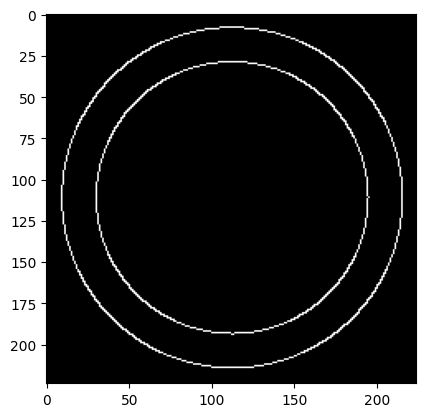

In [40]:
plt.imshow(mask, cmap='gray')
plt.show()

In [ ]:
# Draw the outer contour on the original image in green color with thickness 2
cv2.drawContours(img, mid_contour, -1, (0, 255, 0), 5)

# Display the image
cv2.imshow('Image with outer contour', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x53414f0) is not the object's thread (0x53b7420).
Cannot move to target thread (0x53414f0)

QObject::moveToThread: Current thread (0x53414f0) is not the object's thread (0x53b7420).
Cannot move to target thread (0x53414f0)

QObject::moveToThread: Current thread (0x53414f0) is not the object's thread (0x53b7420).
Cannot move to target thread (0x53414f0)

QObject::moveToThread: Current thread (0x53414f0) is not the object's thread (0x53b7420).
Cannot move to target thread (0x53414f0)

QObject::moveToThread: Current thread (0x53414f0) is not the object's thread (0x53b7420).
Cannot move to target thread (0x53414f0)

QObject::moveToThread: Current thread (0x53414f0) is not the object's thread (0x53b7420).
Cannot move to target thread (0x53414f0)

QObject::moveToThread: Current thread (0x53414f0) is not the object's thread (0x53b7420).
Cannot move to target thread (0x53414f0)

QObject::moveToThread: Current thread (0x53414f0) is not the object's thread

In [50]:
# Create a mask image with the same size as the original image
mask = np.zeros(img.shape[:2], dtype=np.uint8)

# Draw the contours of the spacer/ring on the mask image
cv2.drawContours(mask, outer_contour, -1, 255, -1)
cv2.drawContours(mask, inner_contour, -1, 0, -1)

# Apply the mask to the original image to keep only the ring region
ring = cv2.bitwise_and(img, img, mask=mask)

In [ ]:
plt.imshow(ring, cmap='gray')
plt.show()

In [71]:
window_size = (25, 25)
step_size = 5

# Define the center of the ring and the radius of the ring
x, y, _, _ = cv2.boundingRect(outer_contour[0])
center = (x + int((outer_contour[0][0][0][0] + inner_contour[0][0][0][0])/2), y + int((outer_contour[0][0][0][0] + inner_contour[0][0][0][0])/2))
radius = int((outer_contour[0].shape[0] + inner_contour[0].shape[0])/4)

# Loop over the angles around the ring
for angle in range(0, 360, step_size):
    angle_rad = math.radians(angle)

    # Loop over the positions around the circumference of the ring
    for offset in range(0, radius - window_size[0], step_size):
        x = int(center[0] + offset * math.cos(angle_rad))
        y = int(center[1] + offset * math.sin(angle_rad))

        # Extract the sliding window at this position
        window = ring[y:y+window_size[0], x:x+window_size[1]]

In [57]:
x, y, _, _ = cv2.boundingRect(outer_contour[0])

In [65]:
center = (x + int((outer_contour[0][0][0][0] + inner_contour[0][0][0][0])/2), y + int((outer_contour[0][0][0][0] + inner_contour[0][0][0][0])/2))

In [69]:
radius = int((outer_contour[0].shape[0] + inner_contour[0].shape[0])/4)

In [75]:
outer_contour[0].shape[0]

292

In [15]:
import itertools

# define the ranges for each variable
def get_orth_actions(no_of_actions, action_range = (-1,1)):
    var_ranges = [action_range]*no_of_actions

    # generate all the possible combinations
    combinations = list(itertools.product(*[range(r[0], r[1]+1) for r in var_ranges]))

    # filter out the non-orthogonal combinations
    orthogonal_combinations = []
    for c1 in combinations:
        is_orthogonal = True
        for c2 in orthogonal_combinations:
            if sum([c1[i]*c2[i] for i in range(len(c1))]) != 0:
                is_orthogonal = False
                break
        if is_orthogonal:
            orthogonal_combinations.append(c1)

    # print the orthogonal combinations
    return orthogonal_combinations

In [16]:
orthogonal_combinations = get_orth_actions(16)

In [22]:
import numpy as np
import pandas as pd
m = pd.DataFrame(orthogonal_combinations)

In [29]:
m = pd.DataFrame(orthogonal_combinations)
k = m.sample()

In [34]:
list(np.array(k))

[array([-1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1])]

In [11]:
from gym import spaces
m = spaces.Box(-1, 1, shape=(16,))

In [13]:
orthogonal_combinations

NameError: name 'orthogonal_combinations' is not defined

In [9]:
import os
import cv2
import numpy as np
dir = '/home/mohanty/PycharmProjects/Data/spacer_data/train_64*64*32/good/good/'

In [11]:
avg_img =[]
for imf in os.listdir(dir):
    img =  cv2.imread(dir+ imf, cv2.IMREAD_GRAYSCALE)/255
    avg_img.append(np.average(img))

In [14]:
min(avg_img)

0.3061446844362744

In [15]:
np.mean(avg_img)


0.6013894575249491

In [16]:
max(avg_img)

0.8553529028799021

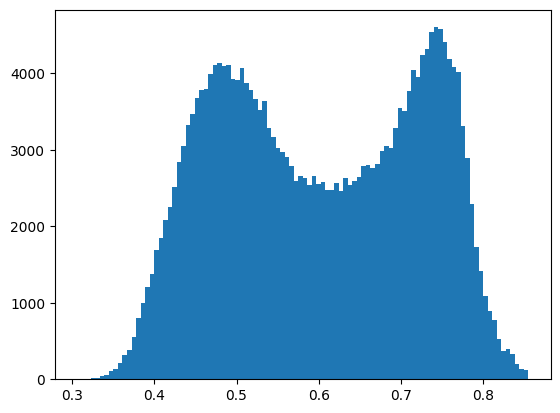

In [19]:
import matplotlib.pyplot as plt
plt.hist(avg_img, bins=100)
plt.show()

In [1]:
import cv2

In [5]:
m = cv2.imread('/home/mohanty/Desktop/mat2_.png', cv2.IMREAD_GRAYSCALE)

In [6]:
m

array([[0, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)